# 19013880 Reading Week Task 08/11/19

### 1a) Importing functions

In [143]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


### 1b) Plotting the data

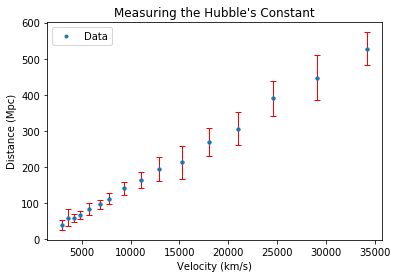

In [174]:
xdata, ydata, yerror = np.loadtxt("hubble_data.csv", skiprows = 2, unpack=True, delimiter=',') #'skiprows' is there because there is a row that python cant read so you have to skip it
plt.figure()
plt.plot(xdata,ydata,".",label='Data')
plt.xlabel("Velocity (km/s)")
plt.ylabel("Distance (Mpc)")
plt.title("Measuring the Hubble's Constant")
plt.errorbar(xdata,ydata,yerror,linewidth=1, capsize=3, ecolor='red',fmt="o",markersize=3)
plt.legend()


### 1c)Adapting code from session 5

In [145]:
# Gradient,intercept and uncertainties code adapted from student 19013880 submission for PHAS0007 Session 5
mean_xdata = np.mean(xdata) #calculate the mean of the x-data
mean_ydata = np.mean(ydata)#calculate the mean of the y-data
slope = np.sum(xdata*(ydata-mean_ydata))/np.sum(xdata*(xdata-mean_xdata)) #calculate gradient
print("The slope is", slope, "Mpc km^-1 s")
intercept = mean_ydata - slope*mean_xdata #calculate y-intercept
print("The y-intercept is ", intercept, "Mpc")
sumofsquares = np.sum((ydata-(slope*xdata + intercept))**2) #calculate the sum of the square distances to the LOBF

#The equations used below are from 24-26 (p38) in Dr Llorente-Garcia's PHAS0007 Data Analysis handbook
D = np.sum((xdata-mean_xdata)**2)
uncertaintyinslope = np.sqrt(sumofsquares/((11-2)*D))   
print("The uncertainty in the slope is ", uncertaintyinslope,  "Mpc km^-1 s")
uncertaintyinintercept = np.sqrt(((1/11)+((mean_xdata)**2)/D)*(sumofsquares/(11-2)))
print("The uncertainty in the y-intercept is", uncertaintyinintercept, "Mpc" )

The slope is 0.015581875025882406 Mpc km^-1 s
The y-intercept is  -7.665453841663492 Mpc
The uncertainty in the slope is  0.0002591941927322033 Mpc km^-1 s
The uncertainty in the y-intercept is 4.504390729894979 Mpc


### 1d)Implementing the following equations
Weightings: 
$$ w_i = \frac{1}{(\Delta y_i)^2} {(1)} $$

Weighted Slope:
$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2}\\
= \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} {(2)}$$

Weighted Intercept:
Equation (5):
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} {(3)} $$

Uncertainty in weighted slope:
$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} {(4)} $$

Uncertainty in weighted intercept:
$$ \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} {(5)} $$

In [146]:
#We now calculate the slope and intercepty for the weighted fit:
weight=1/((yerror)**2)#First we calculate the weight for each data point
delta=(np.sum(weight)*np.sum(weight*(xdata**2)))-(np.sum(weight*xdata)**2)
weightedm=((np.sum(weight)*np.sum(weight*xdata*ydata))-(np.sum(weight*xdata)*np.sum(weight*ydata)))/delta
weightedc=((np.sum(weight*(xdata**2))*np.sum(weight*ydata))-(np.sum(weight*xdata)*np.sum(weight*xdata*ydata)))/delta
uncertaintyinweightedm=np.sqrt(np.sum(weight)/delta)
uncertaintyinweightedc=np.sqrt(np.sum((xdata**2)*weight)/delta)
print("The weighted slope is", weightedm, "Mpc km^-1 s")
print("The weighted y-intercept is ", weightedc, "Mpc")
print("The uncertainty in the weigted slope is ", uncertaintyinweightedm,  "Mpc km^-1 s")
print("The uncertainty in the weighted y-intercept is", uncertaintyinweightedc, "Mpc" )

The weighted slope is 0.015502698613504395 Mpc km^-1 s
The weighted y-intercept is  -6.881414116663961 Mpc
The uncertainty in the weigted slope is  0.0009401002347956379 Mpc km^-1 s
The uncertainty in the weighted y-intercept is 7.858500366636018 Mpc


### 2) Calculating unweighted and weighted fit using np.polyfit function

In [171]:
#The below UNWEIGHTED fitting code is from “Script for linear fitting using Python” from the PHAS0007 Data Analysis and Statistics Moodle. 
#For the UNWEIGHTED data, the gradient and slope is:
degree = 1 
fit, cvm = np.polyfit(xdata,ydata,degree,cov='true')
# Outputs of np.polyfit are fit parameters (fit) and covariance matrix (cvm)
# The slope is the first element of fit: a = fit[0].
# The intercept is the second element of fit: b = fit[1].
# To obtain the uncertainties of fit parameters we get the diagonal elements
# of the covariance matrix:
dfit = [np.sqrt(cvm[i,i]) for i in range(2)] 
# The error of the slope is dfit[0].
# The error of the intercept is dfit[1].
# Print fit parameters with their errors (to 2 decimal places):
print(u"slope =  ({0:0.2f} \xb1 {1:0.2f}) Mpc km^-1 s".format(fit[0], dfit[0]))
print(u"y-intercept = ({0:0.2f} \xb1 {1:0.2f}) Mpc".format(fit[1], dfit[1]))


slope =  (0.02 ± 0.00) Mpc km^-1 s
y-intercept = (-7.67 ± 3.36) Mpc


In [172]:
#The below WEIGHTED fitting code is from “Script for linear fitting using Python” from the PHAS0007 Data Analysis and Statistics Moodle. 
#For the WEIGHTED data, the gradient and slope is:
weight2=1/yerror
wfit, cvm = np.polyfit(xdata,ydata,degree,w=weight2,cov='unscaled')
# Outputs and errors of fitted parameters are same as before.
wdfit = [np.sqrt(cvm[i,i]) for i in range(2)]
# Print fit parameters with their errors (to 2 decimal places):
print(u"slope = ({0:0.2f} \xb1 {1:0.2f}) Mpc km^-1 s".format(wfit[0], wdfit[0]))
print(u"y-intercept = ({0:0.2f} \xb1 {1:0.2f}) Mpc".format(wfit[1], wdfit[1]))

slope = (0.02 ± 0.00) Mpc km^-1 s
y-intercept = (-6.88 ± 7.86) Mpc


### 3) Calculating unweighted and weighted fit using curve_fit function

In [149]:
##The below code is from 'SupplementaryNotebookRW2019'##
# Use scipy's curve_fit function to fit the data
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize
def straight_line(x,m,c):
    """Calculates a straight line y = mx+c
    Inputs: x value (or set of x values)
            gradient of straight line m
            y-intercept of straight line c
    Returns: the corresponding y value(s)"""
    y = m*x + c # equation for straight line
    return y

# Unweighted fit:
# poptUW: Optimized parameters for the unweighted fit
# pcovUW: matrix of covariance for the unweighted fit 
poptUW,pcovUW = curve_fit(straight_line,xdata,ydata)
uncertainty = [np.sqrt(pcovUW[i,i]) for i in range(2)] #The uncertainties of the unweighted parameters
print(u"The unweighted slope is ({0:0} \xb1 {1:0}) Mpc km^-1 s".format(poptUW[0], uncertainty[0]))
print(u"The unweughted y-intercept is ({0:0} \xb1 {1:0}) Mpc".format(poptUW[1], uncertainty[1]))

# Weighted fit
# poptW: Optimized parameters for the weighted fit
# pcovW: matrix of covariance for the weighted fit 
poptW,pcovW = curve_fit(straight_line,xdata,ydata, sigma=yerror, absolute_sigma=True)
uncertainty_weight = [np.sqrt(pcovW[i,i]) for i in range(2)] #The uncertainties of the weighted parameters
print(u"The unweighted slope is ({0:0} \xb1 {1:0}) Mpc km^-1 s".format(poptW[0], uncertainty_weight[0])) 
print(u"The unweighted y-intercept is ({0:0} \xb1 {1:0}) Mpc".format(poptW[1], uncertainty_weight[1]))

The unweighted slope is (0.015581874993853734 ± 0.00020781773315223012) Mpc km^-1 s
The unweughted y-intercept is (-7.665453210233705 ± 3.364858743089755) Mpc
The unweighted slope is (0.015502698594656278 ± 0.0009401002203658244) Mpc km^-1 s
The unweighted y-intercept is (-6.881413924365953 ± 7.858500568411606) Mpc


### 3a) How curve_fit works:
The inputs are the x and y values but they also include the input of the error bars. Error bars are used when weighted fits are used. The function gives out an array popt and an array pcov. popt makes the sum of the squares of the residuals minimised. pcov caclulates the covariance matrix.

Reference: scipy.org

### 3b) Explanation of the covariance matrix:

Covariance: A measure of how the x and y calues change with respect to each other.
<br>
Positive = x and y both going the same way (e.g. both increasing).
<br>
Negative = x and y both going opposite way (e.g. one increasing, other decreasing).

Covariance Matrix(2x2):
<br>
[a b]
<br>
[c d]

Each diagonal value(foreward slash) is the variances of x and y.
<br>
Each non-diagonal value(backward slash) is the COvariances of x and y.

Reference:
Gada, J. (2019).

### 4a) Outputting ALL results so far

In [150]:
#Using a single code cell to output all of the results so far:
print("The gradients and slopes from my submission for PHAS0007 Session 5 are:")
print("The unweighted slope is", "(",slope ,"+-", uncertaintyinslope,")", "Mpc km^-1 s")
print("The unweighted y-intercept is ", "(", intercept ,"+-", uncertaintyinintercept,")", "Mpc")
print("The weighted slope is", "(", weightedm ,"+-", uncertaintyinweightedm,")", "Mpc km^-1 s")
print("The weighted y-intercept is ", "(", weightedc ,"+-", uncertaintyinweightedc,")", "Mpc")
print()
print()
print("The gradients and slopes from the polynomial fit (np.polyfit) method are:")
print(u"The unweighted slope = ({0:0} \xb1 {1:0}) Mpc km^-1 s".format(fit[0], dfit[0]))
print(u"The unweightedy-intercept = ({0:0} \xb1 {1:0}) Mpc".format(fit[1], dfit[1]))
print(u"The weighted slope = ({0:0} \xb1 {1:0}) Mpc km^-1 s".format(wfit[0], wdfit[0]))
print(u"The weighted y-intercept = ({0:0} \xb1 {1:0}) Mpc".format(wfit[1], wdfit[1]))
print()
print()
print("The gradients and slopes from the cruve_fit function are:")
print(u"The unweighted slope is ({0:0} \xb1 {1:0}) Mpc km^-1 s".format(poptUW[0], uncertainty[0]))
print(u"The unweughted y-intercept is ({0:0} \xb1 {1:0}) Mpc".format(poptUW[1], uncertainty[1]))
print(u"The unweighted slope is ({0:0} \xb1 {1:0}) Mpc km^-1 s".format(poptW[0], uncertainty_weight[0]))
print(u"The unweighted y-intercept is ({0:0} \xb1 {1:0}) Mpc".format(poptW[1], uncertainty_weight[1]))

The gradients and slopes from my submission for PHAS0007 Session 5 are:
The unweighted slope is ( 0.015581875025882406 +- 0.0002591941927322033 ) Mpc km^-1 s
The unweighted y-intercept is  ( -7.665453841663492 +- 4.504390729894979 ) Mpc
The weighted slope is ( 0.015502698613504395 +- 0.0009401002347956379 ) Mpc km^-1 s
The weighted y-intercept is  ( -6.881414116663961 +- 7.858500366636018 ) Mpc


The gradients and slopes from the polynomial fit (np.polyfit) method are:
The unweighted slope = (0.0155818750258824 ± 0.0002078176855382906) Mpc km^-1 s
The unweightedy-intercept = (-7.665453841663435 ± 3.3648582113872263) Mpc
The weighted slope = (0.015502698613504408 ± 0.0009401002347956373) Mpc km^-1 s
The weighted y-intercept = (-6.881414116663822 ± 7.8585003666360125) Mpc


The gradients and slopes from the cruve_fit function are:
The unweighted slope is (0.015581874993853734 ± 0.00020781773315223012) Mpc km^-1 s
The unweughted y-intercept is (-7.665453210233705 ± 3.364858743089755) Mpc


### 4b)
I have chosen to choose the results from my submission 5. This is because it is ouputed to more decimal places than the curve_fit function. I have also, personally, written the code my self from scratch and I know the 'ins and outs' of it. So, i feel more comfortable using it.

### 4c,d) Using chosen results to creat enew plot

The unweighted slope is (0.0156 ± 0.0003) Mpc km^-1 s
The unweighted y-intercept is (-8 ± 5) Mpc
The weighted slope is (0.0155 ± 0.0009) Mpc km^-1 s
The weighted y-intercept is (-7 ± 8) Mpc


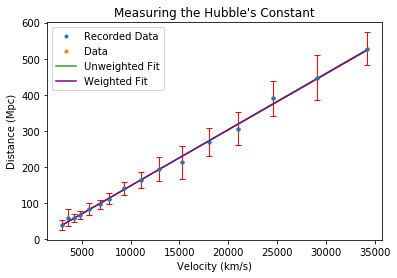

In [173]:
#Creating a new plot that includes the data with errorbars and both the unweighted and weighted fitted lines:
plt.figure()
plt.plot(xdata,ydata, '.', label="Recorded Data")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Distance (Mpc)")
plt.title("Measuring the Hubble's Constant")
plt.errorbar(xdata,ydata,yerror,linewidth=1, capsize=3, ecolor='red',fmt="o",markersize=3)
plt.plot(xdata,ydata, '.', label='Data')

yunweighted=(slope*xdata) + intercept #The equation of a line to calculate the unweighted fit
yweighted=(weightedm*xdata) + weightedc #The equation of a line to calculate the weighted fit

plt.plot(xdata,yunweighted, label="Unweighted Fit") #Plot the unweighted fit
plt.plot(xdata,yweighted, label="Weighted Fit",color='purple') #Plot the weighted fit

plt.legend()

#State ALL of the fit parameters in scientific notation:
print("The unweighted slope is ({0:0.4f} ± {1:0.4f}) Mpc km^-1 s".format(slope,uncertaintyinslope)) 
print("The unweighted y-intercept is ({0:0.0f} ± {1:0.0f}) Mpc".format(intercept,uncertaintyinintercept))
print("The weighted slope is ({0:0.4f} ± {1:0.4f}) Mpc km^-1 s".format(weightedm,uncertaintyinweightedm))
print("The weighted y-intercept is ({0:0.0f} ± {1:0.0f}) Mpc".format(weightedc,uncertaintyinweightedc))



### 4e) Calculating and plotting residuals using the equation:
$$d_i = y_i -y_{line}(x_i)\qquad\qquad\qquad\qquad\mathrm {(6)}$$

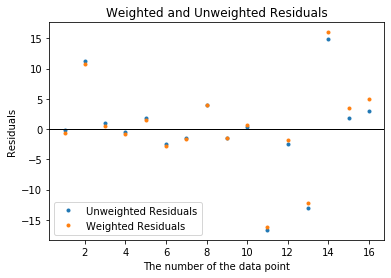

In [104]:
#Calculating and plotting the residuals for the weighted and unweighted data:

dunweighted=ydata-yunweighted #unweighted residuals 
dweighted=ydata-yweighted #Weighted residuals


numberofdata=np.linspace(1,16,16)#This is the x axis-the data number corresponding to the residua

plt.figure()
plt.plot(numberofdata, dunweighted,'.', label="Unweighted Residuals")
plt.plot(numberofdata, dweighted,'.', label="Weighted Residuals")
plt.axhline(y=0, color='black', linestyle='-',linewidth=1)#This is a horizontal line at y=0, to help see how the residuals are distributed around y=0 
plt.xlabel("The number of the data point")
plt.ylabel("Residuals")
plt.title("Weighted and Unweighted Residuals")
plt.legend(loc='lower left')

What I notice:
I can see that most of the residuals, for both weighted and unweighted data, are concentrated around y=0.
I also notice that they are randomly distributed.
This therefore means that, the linear fit is an appropriate fit for the data.

### 5)Calculating Hubble's Constant
$$v=H_0d\quad\quad\quad\quad\quad\quad\mathrm{(7)}$$
It's uncertainty: $$\Delta H_0 = m^{-2}\Delta m \quad\quad\quad\quad\mathrm{(8)}$$
(Llorente-Garcia, 2019:28)

In [169]:
#Calculating a value for hubbles constant using the weighted and unweighted fits:
#v=Hd-Hubbles formula for ressional velocity
H_unweighted=1/slope #1/gradient of the graph is the Hubble's constant-you can tell by looking at the formula
unweighted_constant = 1/fit[0] #using (7)       
error_of_unweighted_constant = ((fit[0])**-2)*dfit[0] #using (8)
weighted_constant = 1/wfit[0] #using (7)
error_of_weighted_constant = ((wfit[0])**-2)*wdfit[0] #using (8)
print("The Hubble's constant for the unweighted fit is: ({0:0.4f} ± {1:0.4f}) km Mpc^-1 s^-1".format(H_unweighted,error_of_unweighted_constant))
H_weighted=1/weightedm #1/gradient of the graph is the Hubble's constant-you can tell by looking at the formula
print("The Hubble's constant for the weighted fit is: ({0:0.4f} ± {1:0.4f}) km Mpc^-1 s^-1".format(H_weighted,error_of_weighted_constant))

The Hubble's constant for the unweighted fit is: (64.1771 ± 0.8559) km Mpc^-1 s^-1
The Hubble's constant for the weighted fit is: (64.5049 ± 3.9116) km Mpc^-1 s^-1


Is the weighted or unweighted for better given the above cell results:
<br>
The weighted fit is better because it is closer to the modern accepted value of 72 km Mpc^-1 s^-1. This is due to the weighted fit accounting for seperate uncertainties of each data point and weighing them up. It then accounts for this in the plot and the rest of the caculations. On the other hand, the unweighted fit does not take this into account. Thus it is less accurate.

### 6)Significance of results to the universe:
The inverse of Hubble's constant is the age of the universe. This is significant because depending on how big or small it is, this affects the field of astronomy and any calculations in involving the age of the universe. 
<br>
<br>
Caclulating the age of the universe:
<br>
Using the conversion $1pc ≈ 3.0857 × 10^{16}m$:

In [168]:
constant = (weighted_constant*(10**3))/((3.0857*10**16)*(10**6))   #convert to SI units
ageinseconds = (1/constant)
ageinbillionsofyears= (ageinseconds)/60/60/24/365/10**9 #convert to billions of years
print("The age of the universe is", ageinbillionsofyears, "billion years")

The age of the universe is 15.168910804062195 billion years


Also, Hubble's constant can calculate the brighness and mass of stars,  deduce the ammount of dark matter in the universe and obtain a scale of galaxy clusters. So the size of Hubble's constant can affect all of astronomy and our perception/understanding of the universe.

## Bibliography
[1] Btc.montana.edu. (2019). Hubble Constant. [online] Available at: https://btc.montana.edu/ceres/html/Universe/hnought.htm [Accessed 15 Nov. 2019].
<br>
[2] Dash, L and Lemos, P (2019). _"PHAS0007 Reading Week Task 2019: Using least-squares fitting to calculate the Hubble constant"_. UCL Moodle resource available from https://moodle.ucl.ac.uk/course/view.php?id=10648&section=13 \[accessed 12 November 2019\]
<br>
[3] Dash. Supplementary Notebook . Available at https://moodle.ucl.ac.uk/course/view.php?id=10648&section=13. [Accessed 15 Nov. 2019].
<br>
[4] Gada, J. (2019). [online] Available at: https://www.quora.com/What-is-the-intuitive-meaning-of-a-covariance-matrix [Accessed 14 Nov. 2019].
<br>
[5] Llorente G Isabel "Script for linear fitting using Python” from the PHAS0007 Data Analysis and Statistics Moodle. Available at https://moodle.ucl.ac.uk/course/view.php?id=16941&section=4 [Accessed 15 Nov. 2019].
<br>
[6] Docs.scipy.org. (2019). scipy.optimize.curve_fit — SciPy v1.3.2 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html [Accessed 15 Nov. 2019].
